# Step 1: Install ipython-sql


In [1]:
# Install ipython-sql if you haven't already
!pip install ipython-sql

# Load SQL magic
%load_ext sql


Defaulting to user installation because normal site-packages is not writeable


# Step 2 : Connect to the SQLite Database


In [2]:
%sql sqlite:///FinalDb.db

# Step 3: Load the Data into the Database

In [3]:
# Load datasets into pandas DataFrames
import pandas as pd
census_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv')
schools_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv')
crime_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv')

## Verify Data loaded correctly

In [7]:
census_data.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [10]:
import sqlite3
# Connect to SQLite database
conn = sqlite3.connect('FinalDb.db')
# Load DataFrames into SQLite tables
census_data.to_sql('CENSUS_DATA', conn, if_exists='replace', index=False)
schools_data.to_sql('CHICAGO_PUBLIC_SCHOOLS', conn, if_exists='replace', index=False)
crime_data.to_sql('CHICAGO_CRIME_DATA', conn, if_exists='replace', index=False)

# Step 4 : Verify Tables

In [11]:
%sql SELECT name From sqlite_master WHERE type = 'table'

 * sqlite:///FinalDb.db
Done.


name
SCHOOLS_DATA
CRIME_DATA
CENSUS_DATA
CHICAGO_PUBLIC_SCHOOLS
CHICAGO_CRIME_DATA


# Step 5 : Run SQL Queries

In [13]:
%sql SELECT * FROM SCHOOLS_DATA LIMIT 2;

 * sqlite:///FinalDb.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.4579999999,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"


In [15]:
%sql SELECT * FROM CRIME_DATA LIMIT 2;

 * sqlite:///FinalDb.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440500000006,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"


In [17]:
%sql SELECT * FROM CHICAGO_PUBLIC_SCHOOLS LIMIT 2;

 * sqlite:///FinalDb.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.4579999999,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"


In [18]:
%sql SELECT * FROM CHICAGO_CRIME_DATA LIMIT 2 

 * sqlite:///FinalDb.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440500000006,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"


In [19]:
%sql TRUNCATE TABLE CHICAGO_PUBLIC_SCHOOLS

 * sqlite:///FinalDb.db
(sqlite3.OperationalError) near "TRUNCATE": syntax error
[SQL: TRUNCATE TABLE CHICAGO_PUBLIC_SCHOOLS]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [20]:
%sql DROP TABLE CHICAGO_PUBLIC_SCHOOLS

 * sqlite:///FinalDb.db
Done.


[]

In [21]:
%sql SELECT name From sqlite_master WHERE type = 'table'

 * sqlite:///FinalDb.db
Done.


name
SCHOOLS_DATA
CRIME_DATA
CENSUS_DATA
CHICAGO_CRIME_DATA


In [22]:
%sql DROP TABLE CHICAGO_CRIME_DATA

 * sqlite:///FinalDb.db
Done.


[]

In [23]:
%sql SELECT name From sqlite_master WHERE type = 'table'

 * sqlite:///FinalDb.db
Done.


name
SCHOOLS_DATA
CRIME_DATA
CENSUS_DATA


In [24]:
%sql SELECT AVG(PER_CAPITA_INCOME) as avg_income, AVG(HARDSHIP_INDEX) as avg_hardship, AVG(PERCENT_HOUSEHOLDS_BELOW_POVERTY) as avg_poverty FROM CENSUS_DATA;


 * sqlite:///FinalDb.db
Done.


avg_income,avg_hardship,avg_poverty
25597.0,49.506493506493506,21.739743589743597


In [25]:
# Understand the frequency of different types of crimes.
%sql SELECT PRIMARY_TYPE, COUNT(*) as crime_count FROM CRIME_DATA GROUP BY PRIMARY_TYPE ORDER BY crime_count DESC LIMIT 10;


 * sqlite:///FinalDb.db
Done.


PRIMARY_TYPE,crime_count
THEFT,106
BATTERY,92
CRIMINAL DAMAGE,58
NARCOTICS,54
OTHER OFFENSE,32
ASSAULT,32
BURGLARY,30
MOTOR VEHICLE THEFT,24
ROBBERY,20
DECEPTIVE PRACTICE,20


# Visualization with Pandas and Matplotlib

 * sqlite:///FinalDb.db
Done.


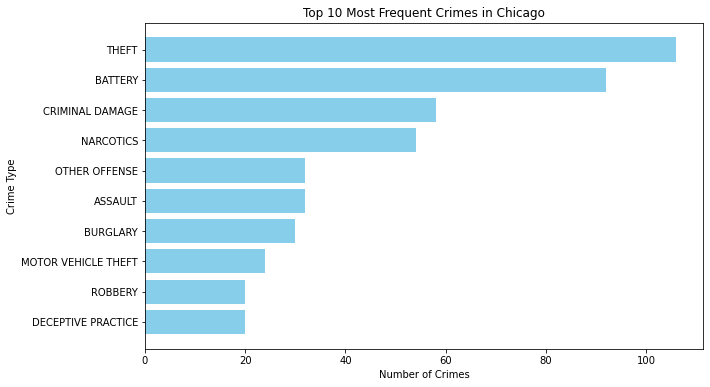

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the top 10 most frequent crimes
crime_data = %sql SELECT PRIMARY_TYPE, COUNT(*) as crime_count FROM CRIME_DATA GROUP BY PRIMARY_TYPE ORDER BY crime_count DESC LIMIT 10;
crime_df = crime_data.DataFrame()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(crime_df['PRIMARY_TYPE'], crime_df['crime_count'], color='skyblue')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.title('Top 10 Most Frequent Crimes in Chicago')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


 * sqlite:///FinalDb.db
Done.


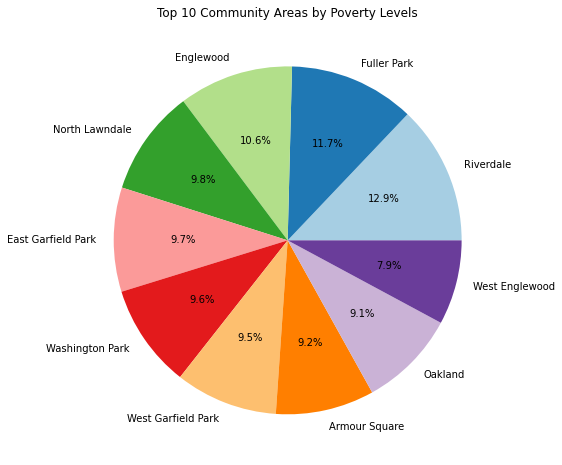

In [27]:
poverty_data = %sql SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS_DATA ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 10;
poverty_df = poverty_data.DataFrame()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(poverty_df['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], labels=poverty_df['COMMUNITY_AREA_NAME'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 10 Community Areas by Poverty Levels')
plt.show()


In [28]:
%sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM CENSUS_DATA;


 * sqlite:///FinalDb.db
Done.


PER_CAPITA_INCOME,HARDSHIP_INDEX
23939,39.0
23040,46.0
35787,20.0
37524,17.0
57123,6.0
60058,5.0
71551,2.0
88669,1.0
40959,8.0
32875,21.0


 * sqlite:///FinalDb.db
Done.


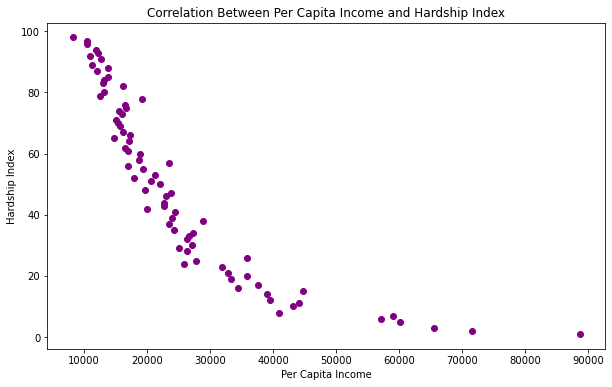

In [29]:
income_hardship_data = %sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM CENSUS_DATA;
income_hardship_df = income_hardship_data.DataFrame()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income_hardship_df['PER_CAPITA_INCOME'], income_hardship_df['HARDSHIP_INDEX'], color='purple')
plt.xlabel('Per Capita Income')
plt.ylabel('Hardship Index')
plt.title('Correlation Between Per Capita Income and Hardship Index')
plt.show()


# conclusion :
## The scatter plot demonstrates a strong negative correlation between Per Capita Income and Hardship Index across community areas. As income levels increase, hardship significantly decreases, particularly at lower income levels. This suggests that economic improvements can substantially reduce hardship, especially in lower-income communities. The analysis highlights the importance of targeting socioeconomic policies in areas with lower incomes to effectively alleviate hardship and improve overall living conditions.